# Module 5: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Understand what can cause violations in the linear regression assumptions.
2. Enhance your skills in identifying and diagnosing violated assumptions.
3. Learn some basic methods of addressing violated assumptions.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load Required Packages
library(ggplot2)

## Problem 1: Let's Violate Some Assumptions!

When looking at a single plot, it can be difficult to discern the different assumptions being violated. In the following problem, you will simulate data that purposefully violates each of the four linear regression assumptions. Then we can observe the different diagnostic plots for each of those assumptions.

#### 1. (a) Linearity

Generate SLR data that violates the linearity assumption, but maintains the other assumptions. Create a scatterplot for these data using ggplot.

Then fit a linear model to these data and comment on where you can diagnose nonlinearity in the diagnostic plots.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



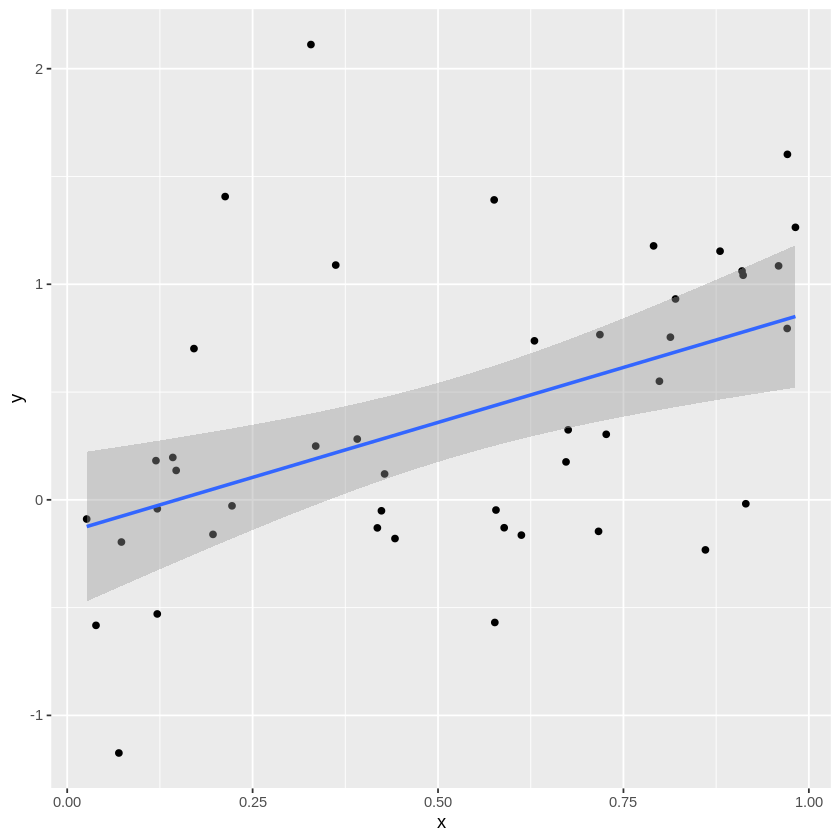

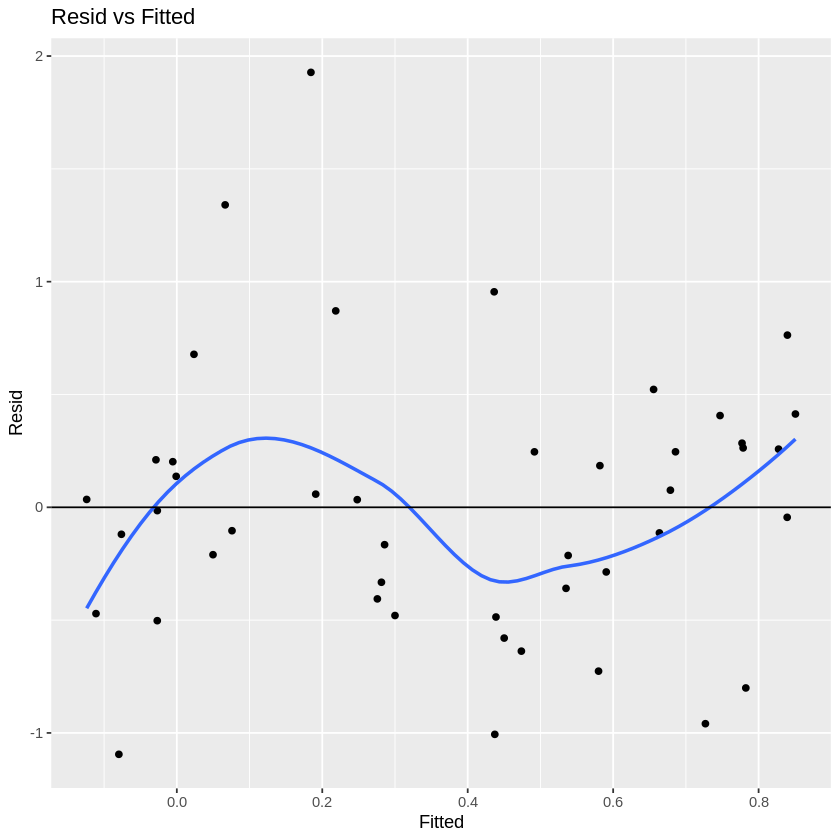

In [10]:
# Your Code Here

set.seed(2000)

n = 45
#create xs from normal dist
x = runif ( n , 0 , 1 )
# create quadratic Y
y = x^2 + rnorm ( n , sd = 0.5 )
#create linear model
lmod = lm ( y ~ x)

ggplot ( mapping = aes (x = x, y = y)) +
    geom_point () +
    geom_smooth ( method = "lm")
    
#diagnose
diag_plot <- ggplot(lmod, aes(.fitted, .resid)) +
  geom_point() +
  stat_smooth(method = "loess", se = FALSE) +
  geom_hline(yintercept = 0) +
  xlab("Fitted") +
  ylab("Resid") +
  ggtitle("Resid vs Fitted")
diag_plot

#### 1. (b) Homoskedasticity

Simulate another SLR dataset that violates the constant variance assumption, but maintains the other assumptions. Then fit a linear model to these data and comment on where you can diagnose non-constant variance in the diagnostic plots.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



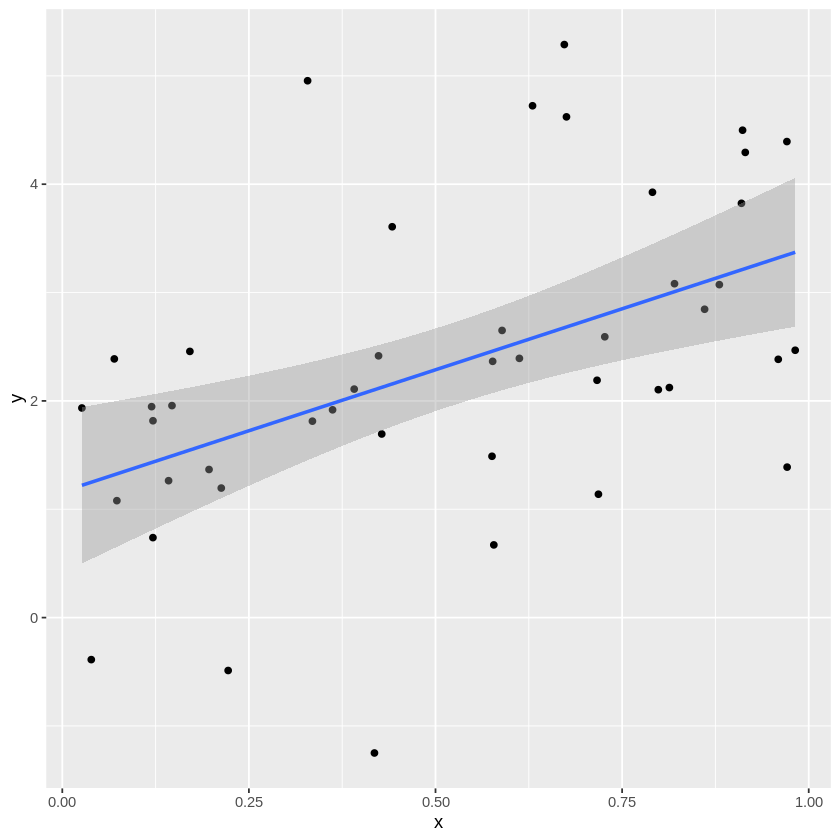

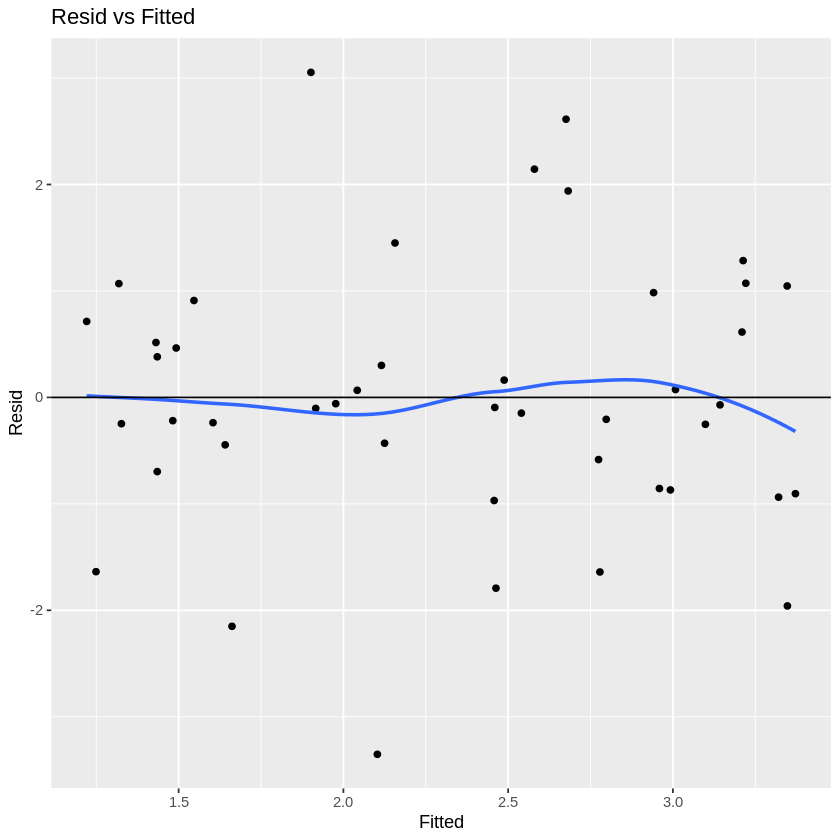

In [9]:
# Your Code Here

error_sd <- seq(0.1, 2, length.out = n)
error <- rnorm(n, sd = error_sd)
y <- 1 + 2 * x + error

lmod = lm ( y ~ x)

ggplot ( mapping = aes (x = x, y = y)) +
    geom_point () +
    geom_smooth ( method = "lm" )
    
#diagnose
diag_plot <- ggplot(lmod, aes(.fitted, .resid)) +
  geom_point() +
  stat_smooth(method = "loess", se = FALSE) +
  geom_hline(yintercept = 0) +
  xlab("Fitted") +
  ylab("Resid") +
  ggtitle("Resid vs Fitted")

diag_plot

#### 1. (c) Independent Errors

Repeat the above process with simulated data that violates the independent errors assumption.

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



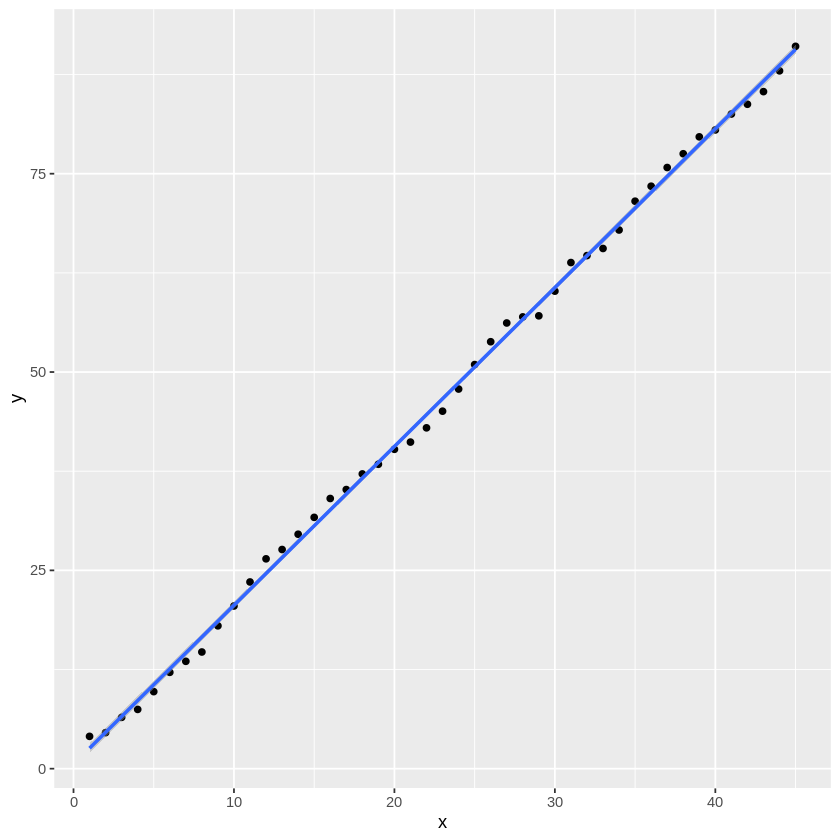

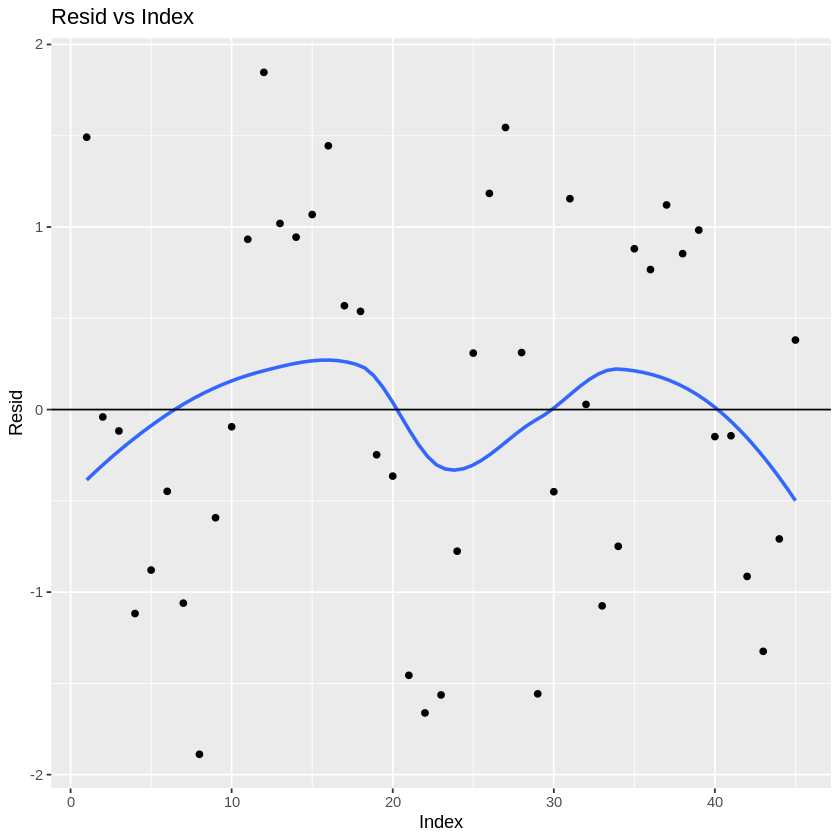

In [17]:
# Your Code Here

x <- seq(1, n)
errors <- arima.sim(model = list(ar = .7), n = n)
y <- 1 + 2 * x + errors
lmod = lm ( y ~ x)

ggplot ( mapping = aes (x = x, y = y)) +
    geom_point () +
    geom_smooth ( method = "lm" )
    
#diagnose
diag_plot <- ggplot(lmod, aes(1:n, .resid)) +
  geom_point() +
  stat_smooth(method = "loess", se = FALSE) +
  geom_hline(yintercept = 0) +
  xlab("Index") +
  ylab("Resid") +
  ggtitle("Resid vs Index")

diag_plot

#### 1. (d) Normally Distributed Errors

Only one more to go! Repeat the process again but simulate the data with non-normal errors.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



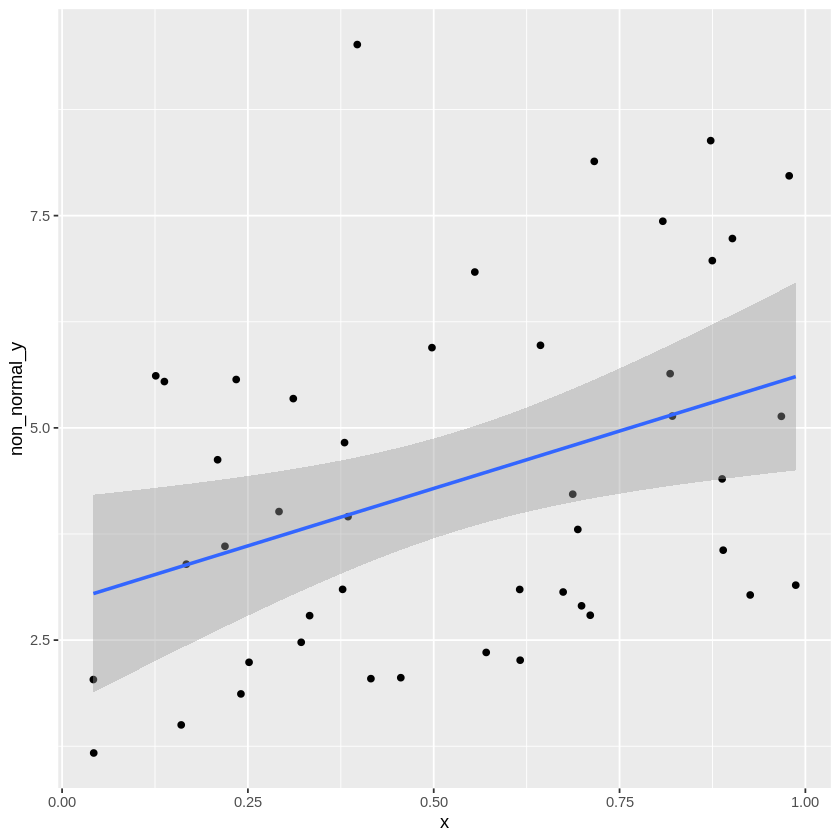

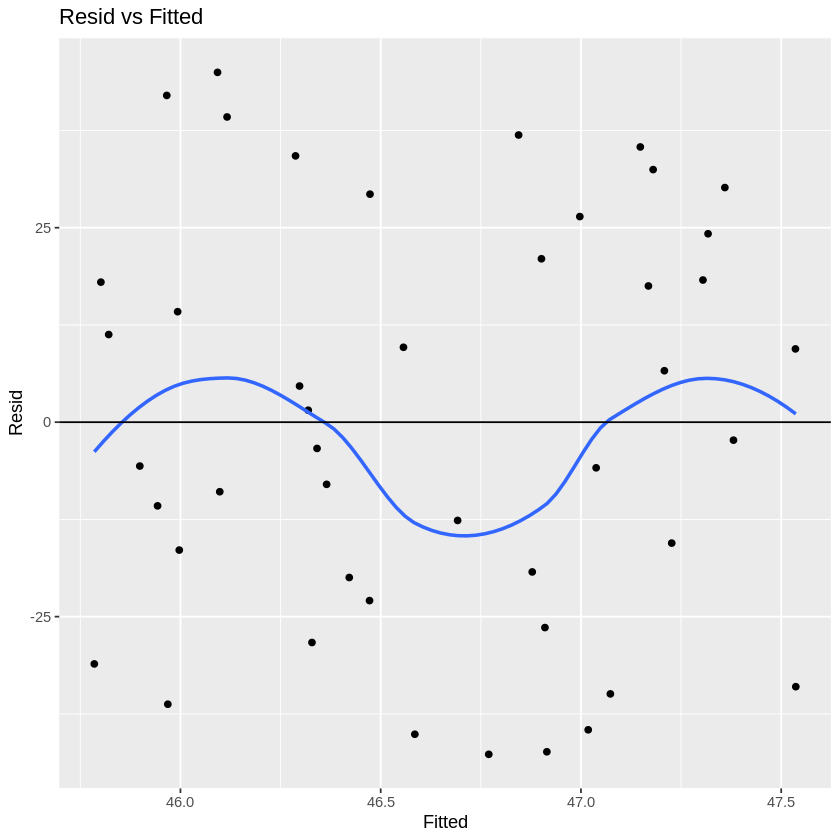

In [18]:
# Your Code Here
x <- runif(n)
errors <- rexp(n, rate = 0.5)
non_normal_y <- 1 + 2 * x + errors
lmod = lm ( y ~ x)
ggplot ( mapping = aes (x = x, y = non_normal_y)) +
    geom_point () +
    geom_smooth ( method = "lm" )
    
#diagnose
diag_plot <- ggplot(lmod, aes(.fitted, .resid)) +
  geom_point() +
  stat_smooth(method = "loess", se = FALSE) +
  geom_hline(yintercept = 0) +
  xlab("Fitted") +
  ylab("Resid") +
  ggtitle("Resid vs Fitted")

diag_plot

# Problem 2: Hats for Sale

Recall that the *hat* or *projection* matrix is defined as 

$$H = X(X^TX)^{-1}X^T.$$

The goal of this question is to use the hat matrix to prove that the fitted values, $\widehat{\mathbf Y}$, and the residuals, $\widehat{\boldsymbol\varepsilon}$, are uncorrelated. It's a bit of a process, so we will do it in steps.

#### 2. (a) Show that $\widehat{Y} = HY$. That is, $H$ "puts a hat on" $Y$.

$$
\hat{Y} = X\hat{B} = X(X^T X)^{-1} X^T Y = HY
$$

#### 2. (b) Show that $H$ is symmetric: $H = H^T$.

$$
H^T = (X(X^T X)^{-1} X^T)^T = (X^T)^T ((X^T X)^{-1})^T X^T = X (X^T X)^{-1} X^T = H
$$

#### 2. (c) Show that $H(I_n - H) = 0_n$, where $0_n$ is the zero matrix of size $n \times n$.**

Because - 
$$
(X^T X)^{-1} X^T X = I_{p+1}
$$

so  - 
$$
HH = (X(X^T X)^{-1} X^T) (X(X^T X)^{-1} X^T) = X(X^T X)^{-1} X^T X(X^T X)^{-1} X^T = X(X^T X)^{-1} X^T = H
$$

therefore - 
$$
H(I_n - H) = H I_n - H H = H - H = 0_n
$$

**2. (d) Stating that $\widehat{\mathbf Y}$ is uncorrelated with $\widehat{\boldsymbol\varepsilon}$ is equivalent to showing that these vectors are orthogonal.\* That is, we want their dot product to equal zero:**

$$ \widehat{\mathbf Y}^T\widehat{\boldsymbol\varepsilon} = 0.$$ 

Prove this result. Also explain why being uncorrelated, in this case, is equivalent to the being orthogonal.

$$
\begin{align*}
\hat{Y}^T \hat{\varepsilon} &= (HY)^T (I - H) Y \\
&= Y^T H^T (I - H) Y \\
&= Y^T H (I - H) Y \\
&= Y^T H (I - H) Y \\
&= Y^T 0_n Y \\
&= 0
\end{align*}
$$

Uncorrelated meas the dot product of the fitted values = 0. and orthoganal is when there dot product = 0

#### 2.(e) Why is this result important in the practical use of linear regression?

it gives us a way to check if the assumptions are met and make sure we're doing the correct thing by using a linear model

## Problem 3: Model Diagnosis

We here at the University of Colorado's Department of Applied Math love Bollywood movies. So, let's analyze some data related to them!

We want to determine if there is a linear relation between the amount of money spent on a movie (it's budget) and the amount of money the movie makes. Any venture capitalists among you will certianly hope that there is at least some relation. So let's get to modelling!

#### 3. (a) Initial Inspection

Load in the data from local directory and create a linear model with `Gross` as the response and `Budget` as the feature. The data is stored in the same local directory and is called `bollywood_boxoffice.csv`. Thank the University of Florida for this specific dataset.

Specify whether each of the four regression model assumptions are being violated.

Data Source: http://www.bollymoviereviewz.com

                  Movie         Gross            Budget      
 1920London          :  1   Min.   :  0.63   Min.   :  4.00  
 2 States\xa0        :  1   1st Qu.:  9.25   1st Qu.: 19.00  
 24(Tamil,Telugu)    :  1   Median : 29.38   Median : 34.50  
 Aashiqui 2          :  1   Mean   : 53.39   Mean   : 45.25  
 AeDilHainMushkil\xa0:  1   3rd Qu.: 70.42   3rd Qu.: 70.00  
 AGentleman          :  1   Max.   :500.75   Max.   :150.00  
 (Other)             :184                                    

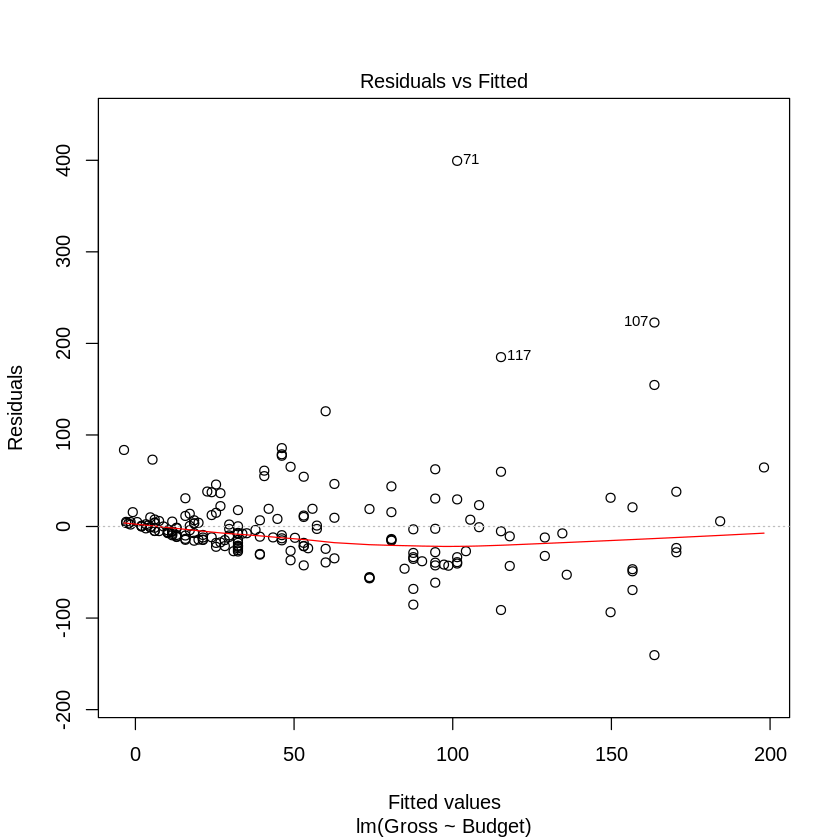

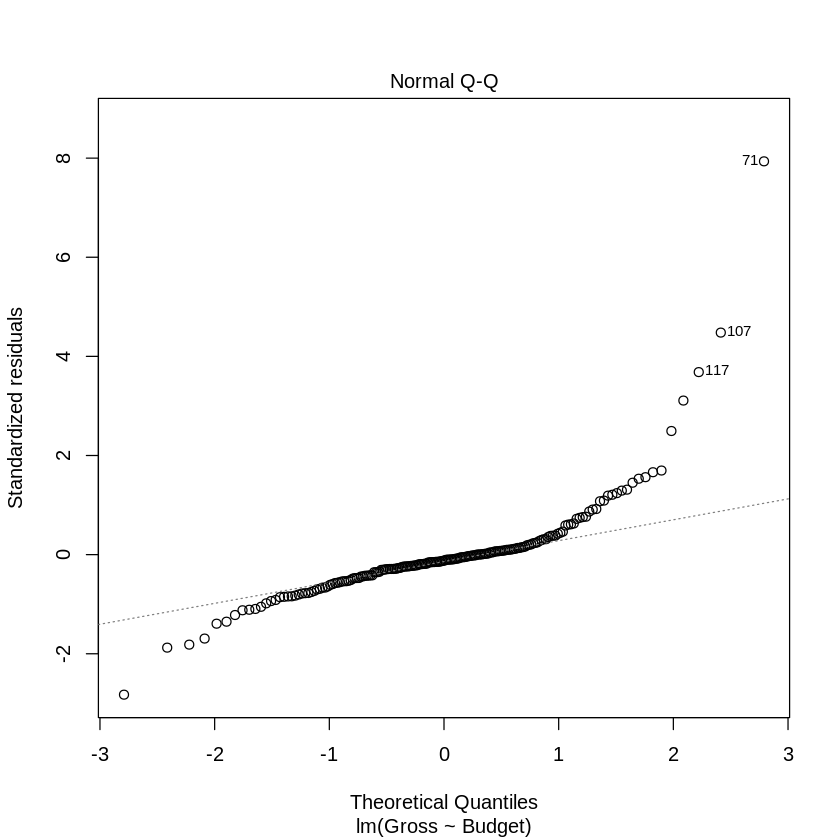

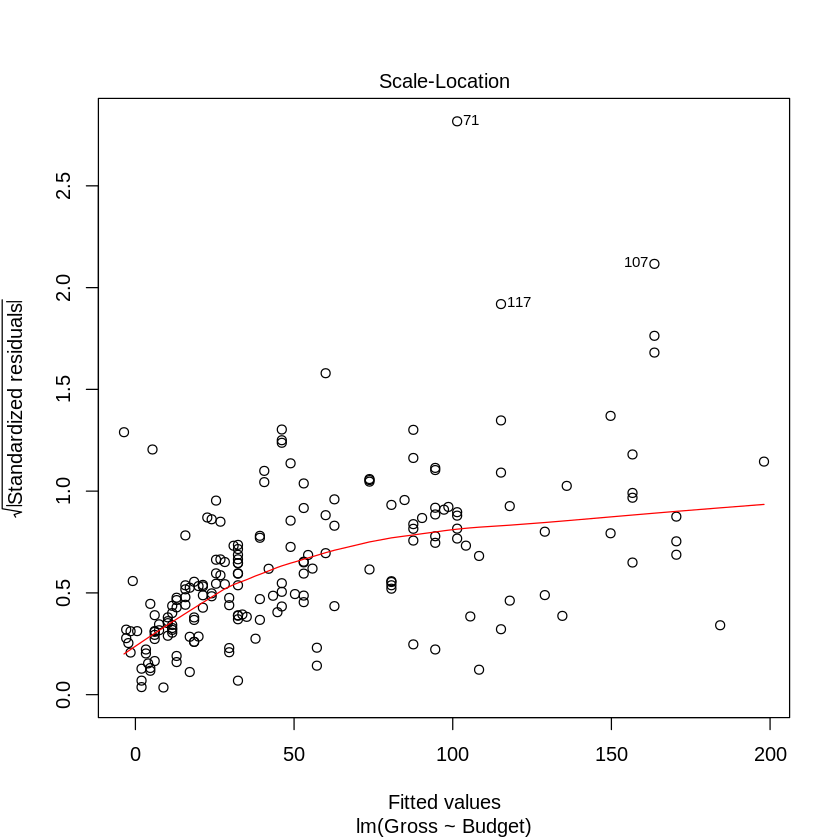

`geom_smooth()` using formula 'y ~ x'



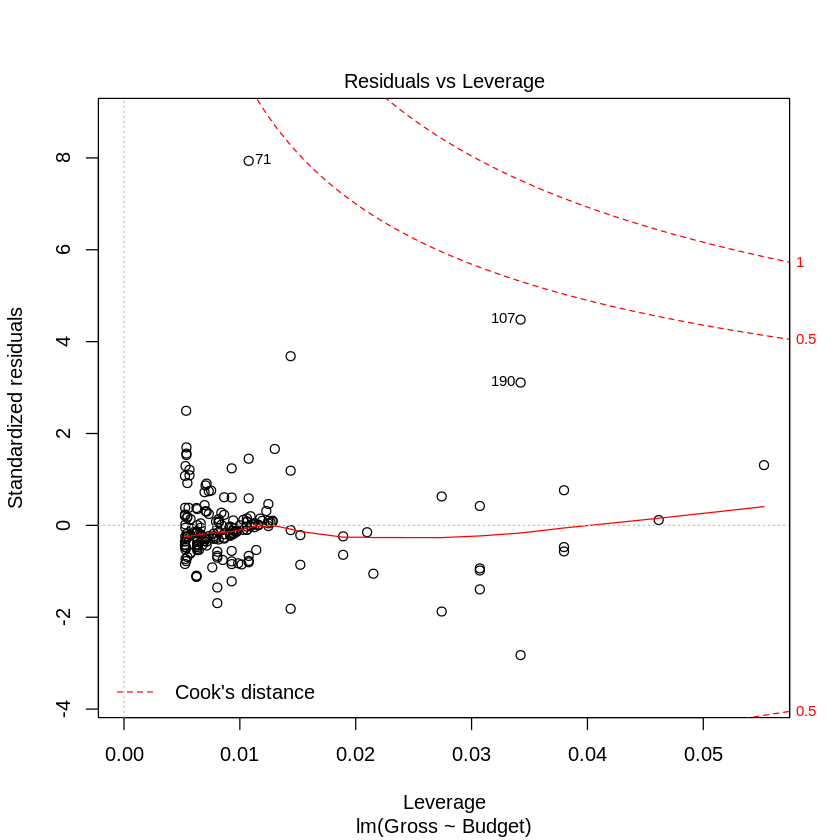

[1] 0.1115942

ERROR: Error in ylab("ith_residua+1") + ggtitle("Successive Residual Plot"): non-numeric argument to binary operator


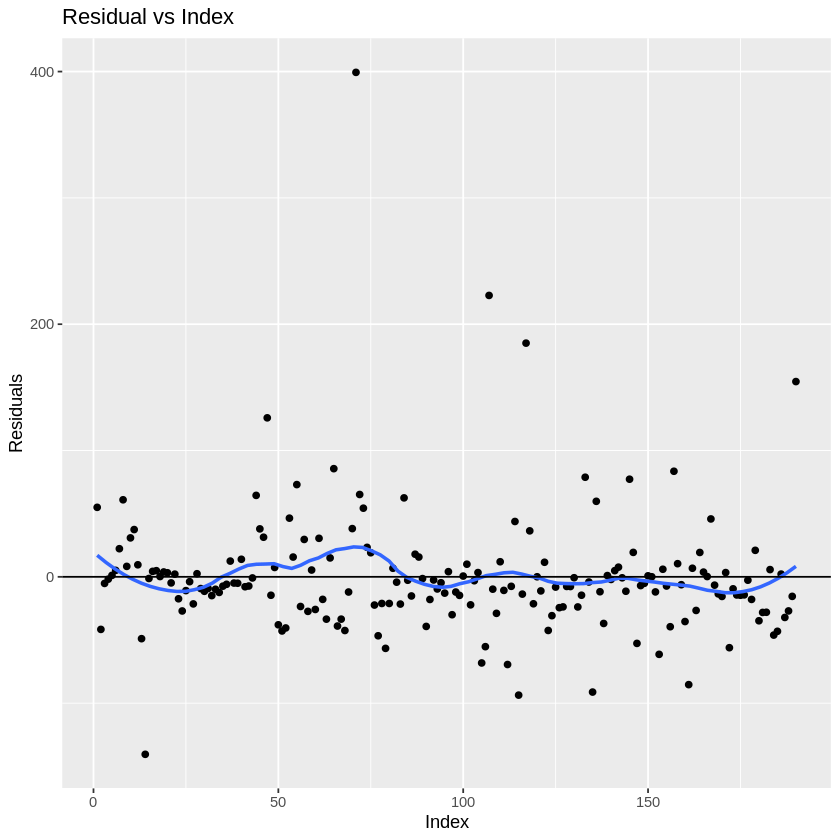

In [31]:
# Load the data
bollywood = read.csv("bollywood_boxoffice.csv")
summary(bollywood)

# Your Code Here

lmod = lm(Gross ~ Budget , data = bollywood )
plot ( lmod )

diag_plot_indexing <- ggplot(lmod, aes(1:dim(bollywood)[1], .resid)) +
  geom_point() +
  stat_smooth(method = "loess", se = FALSE, span = 0.3) +
  geom_hline(yintercept = 0,) +
  xlab("Index") +
  ylab("Residuals") +
  ggtitle("Residual vs Index")
  
diag_plot_indexing

n = dim ( bollywood ) [1] ;
x = head ( resid ( lmod), n-1)
y = tail( resid ( lmod), n-1)
cor ( x, y )
standard_residual_plot_df = data.frame ( x, y)
diag_plot_srp <- ggplot ( standard_residual_plot_df , aes ( x = x, y = y )) +
    geom_point () +
    geom_vline(xintercept = 0) +
    geom_hline(yintercept = 0) +
    xlab("ith_residual")
    ylab("ith_residua+1") +
    ggtitle( "Successive Residual Plot" )

Linearity: The residual vs fitted plot indicates a downward trend, suggesting that the relationship between the predictors and the response may not be entirely linear.

Independence: The residual vs index plot lacks structure, and the successive residuals plot indicates weak or no correlation between successive error terms. 

Constant Variance: There are indications (potentially weak) of non-constant variance. This is noticeable in the residual vs fitted plot, where there is more variability for larger fitted values compared to smaller ones.

Normality: The QQ-plot shows departure from normality.


#### 3. (b) Transformations

Notice that the Residuals vs. Fitted Values plot has a 'trumpet" shape to it, the points have a greater spread as the Fitted value increases. This means that there is not a constant variance, which violates the homoskedasticity assumption.

So how do we address this? Sometimes transforming the predictors or response can help stabilize the variance. Experiment with transfomrations on `Budget` and/or `Gross` so that, in the transformed scale, the relationship is approximately linear with a constant variance. Limit your transformations to square root, logarithms and exponentiation. 

Note: There may be multiple transformations that fix this violation and give similar results. For the purposes of this problem, the transformed model doesn't have the be the "best" model, so long as it maintains both the linearity and homoskedasticity assumptions.

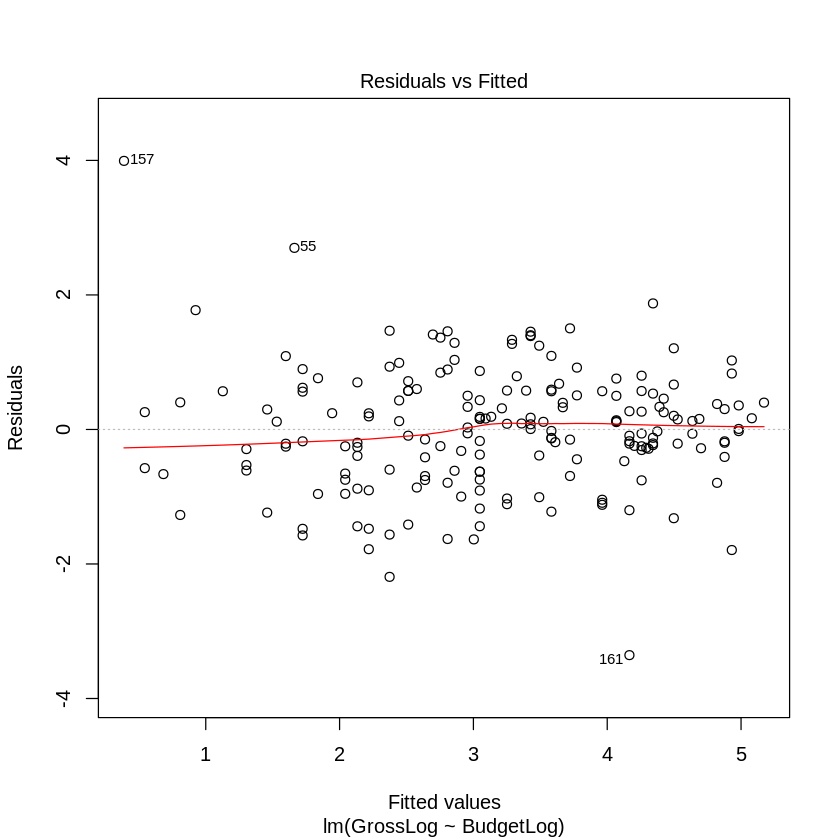

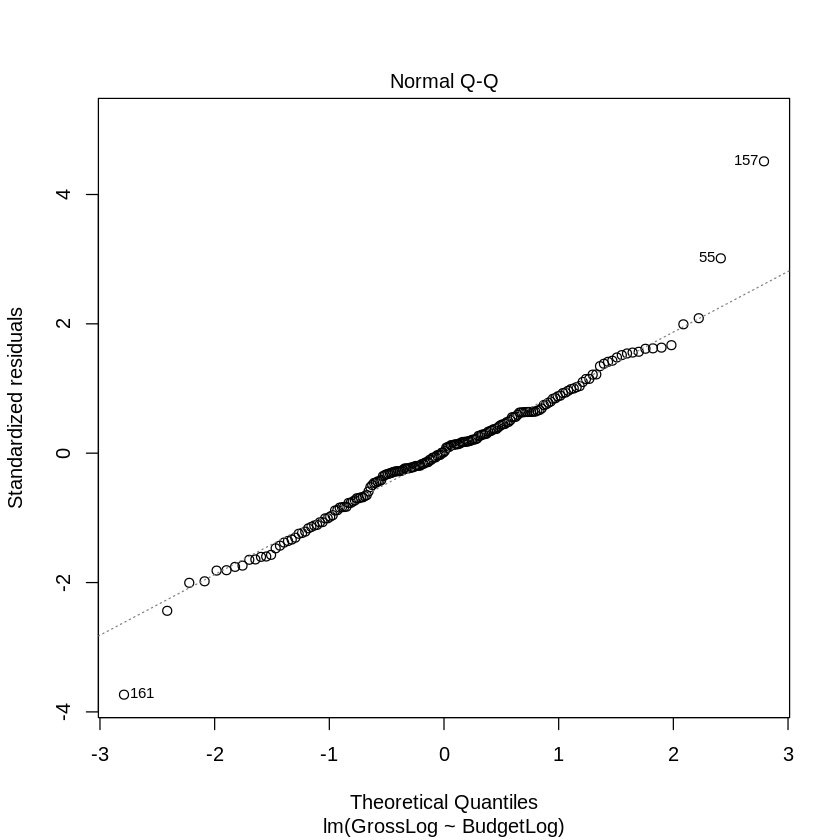

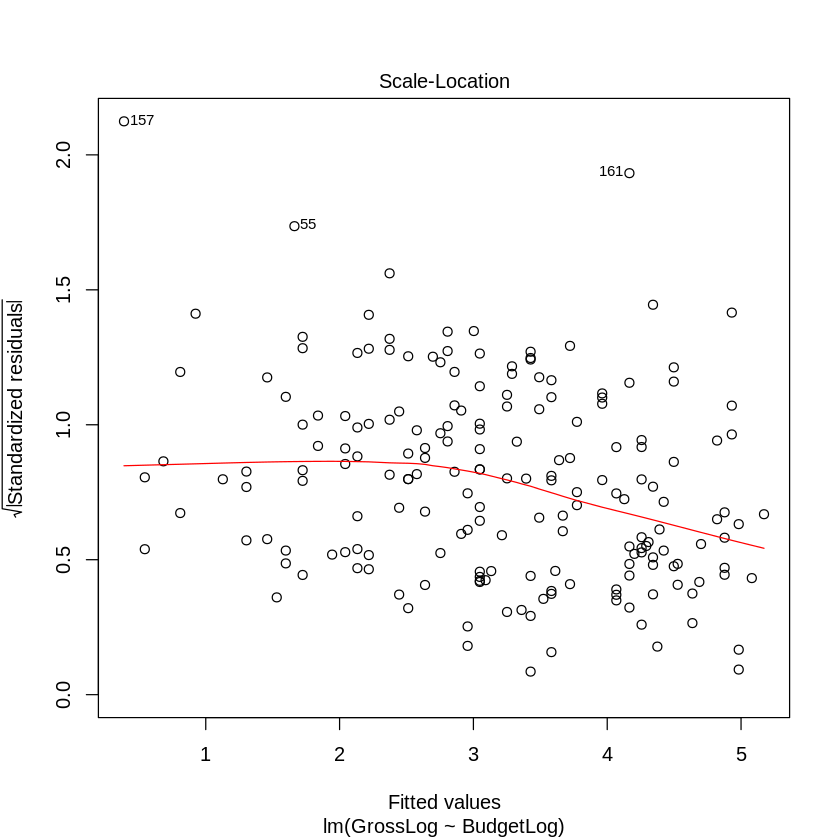

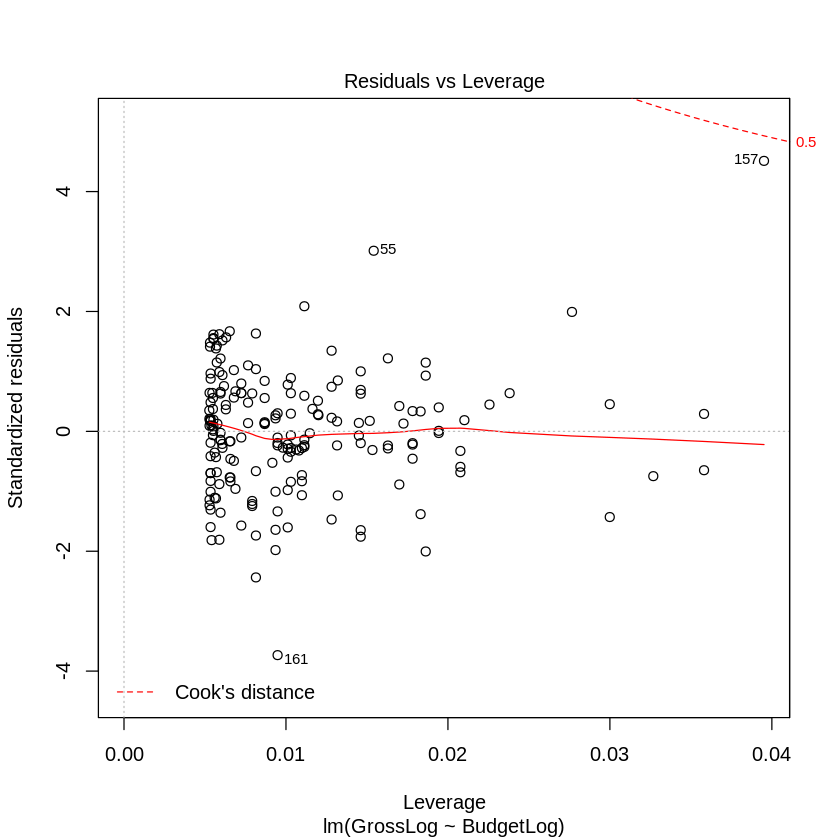

In [32]:
# Your Code Here

bollywood$BudgetLog = log ( bollywood$Budget )
bollywood$GrossLog = log ( bollywood$Gross )
bollywood$BudgetSqrt = sqrt ( bollywood$Budget )
bollywood$GrossSqrt = sqrt ( bollywood$Gross )
lm_log = lm ( GrossLog ~ BudgetLog , bollywood )
plot(lm_log)

#### 3. (c) Interpreting Your Transformation

You've fixed the nonconstant variance problem! Hurray! But now we have a transformed model, and it will have a different interpretation than a normal linear regression model. Write out the equation for your transformed model. Does this model have an interpretation similar to a standard linear model?

In [41]:
summary (lm_log)
coefficients <- coef(lm_log)
paste0("If the log budget is increased by one unit, then the log gross increases by ",round(coefficients[2], 2) ,".") 


Call:
lm(formula = GrossLog ~ BudgetLog, data = bollywood)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3549 -0.5634  0.0186  0.5664  3.9930 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.44023    0.28410  -5.069 9.51e-07 ***
BudgetLog    1.31955    0.07887  16.730  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9029 on 188 degrees of freedom
Multiple R-squared:  0.5982,	Adjusted R-squared:  0.5961 
F-statistic: 279.9 on 1 and 188 DF,  p-value: < 2.2e-16


[1] "If the log budget is increased by one unit, then the log gross increases by 1.32."